![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [58]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [59]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [60]:
#Aplicando un get_dummies
penguins_df = pd.get_dummies(penguins_df, dtype='int')

In [61]:
#Estandarizar dataset
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
scaled_penguins_df = pd.DataFrame(data=X, columns=penguins_df.columns)
scaled_penguins_df.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,1.006042,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,-0.993994,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,1.006042,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,-0.993994,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,1.006042,-1.006042


In [62]:
inertia = []
num_clusters = range(1, 10)

for i in num_clusters:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_penguins_df)
    inertia.append(kmeans.inertia_)

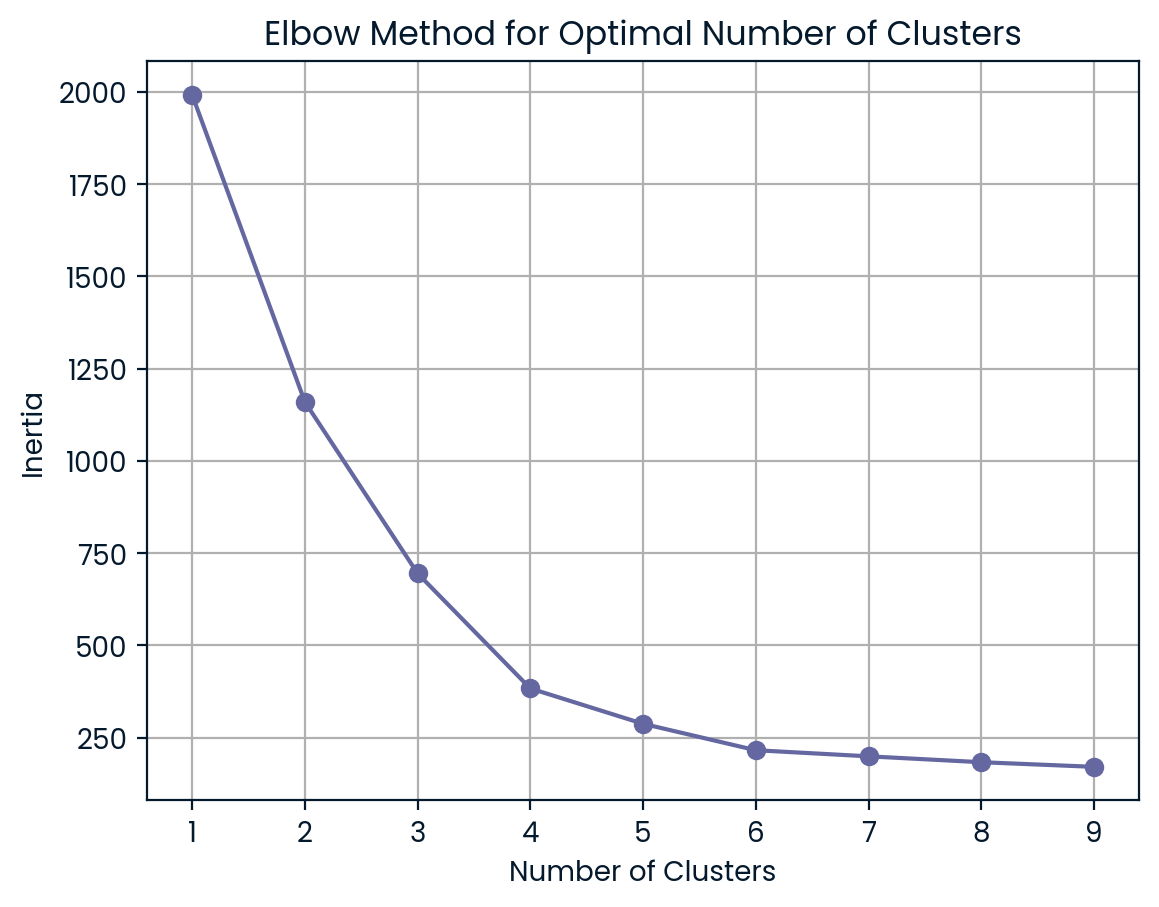

In [63]:
# Graficando el metodo del codo
plt.plot(num_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Lo genial seria agarrar 4 clusters, basandome en el metodo del codo.

In [64]:
#Crear el modelo KMeans con 3 clusters
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

#Ajustar el modelo a los datos escalados
kmeans.fit(scaled_penguins_df)

#Obtener las etiquetas de los clusters
penguins_df['label'] = kmeans.labels_


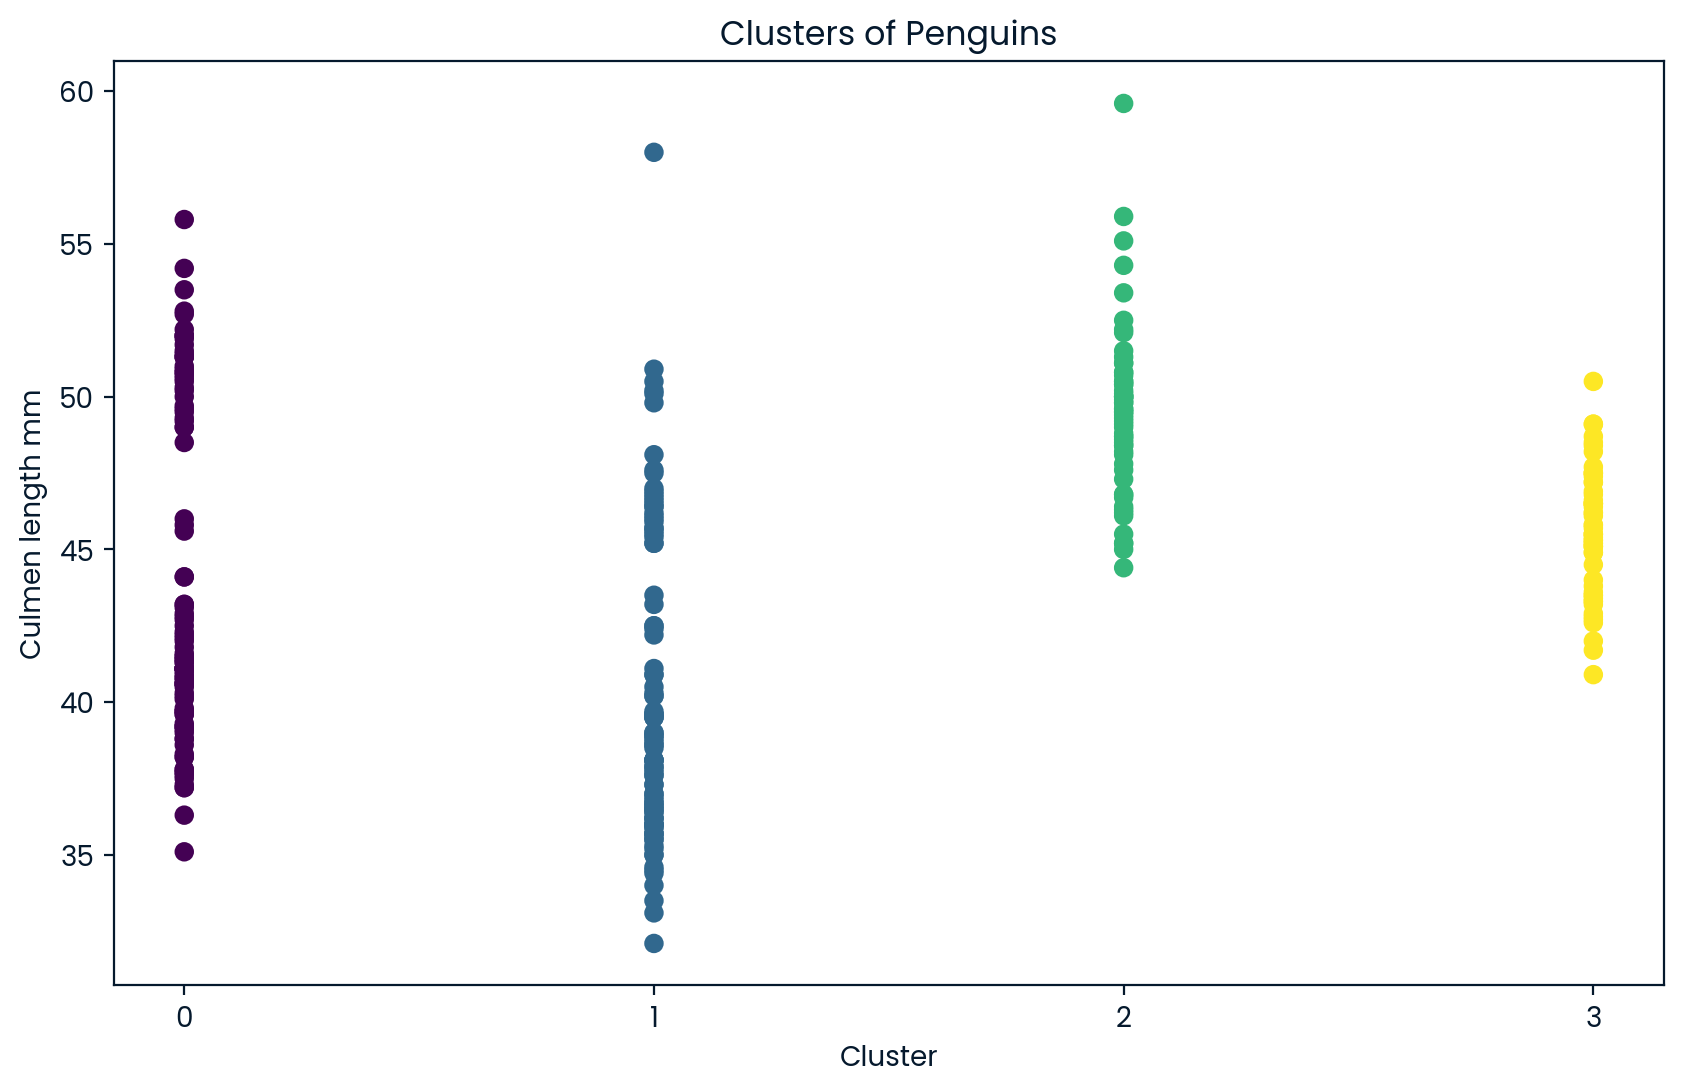

In [65]:
#Visualizar los clusters definidos usando plt.scatter
plt.figure(figsize=(10, 6))

#Graficar los puntos de datos y colorearlos según sus etiquetas de cluster
plt.scatter(kmeans.labels_, penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')

#Añadir título y etiquetas a los ejes
plt.title('Clusters of Penguins')
plt.xlabel('Cluster')
plt.ylabel('Culmen length mm')
plt.xticks(range(int(kmeans.labels_.min()), int(kmeans.labels_.max()) + 1))

plt.show()

In [66]:
#Crear una lista con los nombres de las columnas numéricas (no binarias) del DataFrame penguins_df
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label']

stat_penguins = penguins_df[numeric_columns].groupby('label').mean()

stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,49.473770,15.718033,221.540984
3,45.563793,14.237931,212.706897
